In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
import seaborn as sns

In [11]:
def load_and_fillna(path):
    df = pd.read_csv(path, sep="\t", header=0)
    df.fillna(df.mean())
    df['id2'] = df.index
    df.set_index('Ensembl_ID',inplace=True)
    return df.T

In [12]:
def pca_prep(df, n_comp):
    df = df.iloc[1:,:]
    dataScaled = pd.DataFrame(preprocessing.scale(df),columns = df.columns) 
    pca = PCA(n_components=n_comp)
    pca.fit(dataScaled)
    dfPCA = pca.transform(dataScaled)
    temp = ["PC-"+ str(x) for x in range(1,n_comp+1)]
    extended = pd.DataFrame(pca.components_,columns=dataScaled.columns,index = temp)
    return extended.T


In [13]:
df = load_and_fillna("data/TCGA-LUAD-GE.tsv")

In [14]:
principalCompLUAD = pca_prep(df, 5)

In [15]:
df2 = load_and_fillna("data/TCGA-LUSC-GE.tsv")

In [16]:
principalCompLUSC = pca_prep(df2, 5)

In [17]:
print(principalCompLUAD.nlargest(5, ['PC-1']))
print(principalCompLUAD.nlargest(5, ['PC-2']))
print(principalCompLUSC.nlargest(5, ['PC-1']))
print(principalCompLUSC.nlargest(5, ['PC-2']))

                        PC-1      PC-2      PC-3      PC-4      PC-5
Ensembl_ID                                                          
ENSG00000168066.19  0.004068  0.000059  0.000057 -0.000053  0.000073
ENSG00000160199.13  0.004068  0.000058  0.000098  0.000045 -0.000042
ENSG00000182944.16  0.004068  0.000127  0.000119 -0.000025  0.000066
ENSG00000182149.19  0.004068  0.000134  0.000065 -0.000077  0.000067
ENSG00000182473.19  0.004068  0.000104  0.000064 -0.000064 -0.000056
                        PC-1      PC-2      PC-3      PC-4      PC-5
Ensembl_ID                                                          
ENSG00000066405.11  0.004049  0.001057 -0.029748  0.001481  0.002385
ENSG00000080618.12  0.004063  0.000973 -0.012377  0.002179  0.004933
ENSG00000096088.15  0.004063  0.000640 -0.010000  0.004199  0.014664
ENSG00000108576.8   0.004067  0.000604 -0.006543  0.000142 -0.000635
ENSG00000088926.12  0.004065  0.000593 -0.012000  0.002450  0.001999
                        PC-1      

In [18]:
df.shape

(586, 60488)

In [19]:
principalCompLUAD = principalCompLUAD.T
principalCompLUAD['Target'] = '0'

In [20]:
principalCompLUAD.head()

Ensembl_ID,ENSG00000000003.13,ENSG00000000005.5,ENSG00000000419.11,ENSG00000000457.12,ENSG00000000460.15,ENSG00000000938.11,ENSG00000000971.14,ENSG00000001036.12,ENSG00000001084.9,ENSG00000001167.13,...,ENSGR0000276543.3,ENSGR0000277120.3,ENSGR0000280767.1,ENSGR0000281849.1,__no_feature,__ambiguous,__too_low_aQual,__not_aligned,__alignment_not_unique,Target
PC-1,-0.001676,-0.000028,-0.001675,-0.001388,-0.000673,-0.000604,-0.000775,-0.000912,-0.000299,-0.000365,...,0.004068,0.004068,0.004068,0.004068,0.004068,0.004068,0.004068,0.004068,0.004068,0
PC-2,-0.149663,-0.018969,-0.167814,-0.170663,-0.163008,-0.078096,-0.096229,-0.170478,-0.097126,-0.187566,...,0.000361,0.000361,0.000361,0.000361,0.000324,0.000310,0.000361,0.000361,0.000317,0
PC-3,0.083602,-0.074727,0.093862,-0.004919,0.239022,-0.296755,-0.115605,0.094663,0.200833,0.094013,...,0.000111,0.000111,0.000111,0.000111,0.000109,0.000115,0.000111,0.000111,0.000125,0
PC-4,0.009540,0.113393,-0.038760,0.226401,0.119222,-0.196225,0.008584,-0.212241,-0.017109,0.096653,...,-0.000083,-0.000083,-0.000083,-0.000083,0.000083,-0.000086,-0.000083,-0.000083,-0.000053,0
PC-5,0.037590,-0.147932,-0.034020,0.038914,-0.126610,-0.120666,-0.183676,-0.013734,-0.094485,-0.076791,...,-0.000011,-0.000011,-0.000011,-0.000011,-0.000042,-0.000009,-0.000011,-0.000011,-0.000017,0


In [21]:
principalCompLUSC = principalCompLUSC.T
principalCompLUSC['Target'] = '1'

In [22]:
principalCompLUSC.head()

Ensembl_ID,ENSG00000000003.13,ENSG00000000005.5,ENSG00000000419.11,ENSG00000000457.12,ENSG00000000460.15,ENSG00000000938.11,ENSG00000000971.14,ENSG00000001036.12,ENSG00000001084.9,ENSG00000001167.13,...,ENSGR0000276543.3,ENSGR0000277120.3,ENSGR0000280767.1,ENSGR0000281849.1,__no_feature,__ambiguous,__too_low_aQual,__not_aligned,__alignment_not_unique,Target
PC-1,-0.001909,0.000046,-0.002005,-0.001672,-0.000928,-0.000561,-0.000726,-0.001060,-0.000491,-0.000501,...,0.004068,0.004068,0.004068,0.004068,0.004068,0.004068,0.004068,0.004068,0.004068,1
PC-2,-0.109635,-0.103964,-0.107580,-0.178364,-0.072260,-0.166738,-0.145467,-0.175026,0.005245,-0.183985,...,0.000345,0.000345,0.000345,0.000345,0.000309,0.000300,0.000345,0.000345,0.000308,1
PC-3,-0.151855,0.066114,-0.157676,-0.097140,-0.254460,0.226775,0.119699,-0.007883,-0.227133,-0.141119,...,0.000064,0.000064,0.000064,0.000064,0.000049,0.000053,0.000064,0.000064,0.000053,1
PC-4,-0.134809,0.103148,-0.062382,0.129614,0.082626,-0.022140,-0.304192,-0.175568,0.013891,0.066294,...,-0.000058,-0.000058,-0.000058,-0.000058,-0.000003,-0.000068,-0.000058,-0.000058,-0.000076,1
PC-5,0.026396,-0.108288,0.093030,0.059221,0.216880,-0.037366,0.059344,0.213213,-0.091912,0.123867,...,0.000047,0.000047,0.000047,0.000047,0.000022,0.000060,0.000047,0.000047,0.000067,1


In [23]:
lung = pd.concat([principalCompLUAD,principalCompLUSC])

In [24]:
lung.head()

Ensembl_ID,ENSG00000000003.13,ENSG00000000005.5,ENSG00000000419.11,ENSG00000000457.12,ENSG00000000460.15,ENSG00000000938.11,ENSG00000000971.14,ENSG00000001036.12,ENSG00000001084.9,ENSG00000001167.13,...,ENSGR0000276543.3,ENSGR0000277120.3,ENSGR0000280767.1,ENSGR0000281849.1,__no_feature,__ambiguous,__too_low_aQual,__not_aligned,__alignment_not_unique,Target
PC-1,-0.001676,-0.000028,-0.001675,-0.001388,-0.000673,-0.000604,-0.000775,-0.000912,-0.000299,-0.000365,...,0.004068,0.004068,0.004068,0.004068,0.004068,0.004068,0.004068,0.004068,0.004068,0
PC-2,-0.149663,-0.018969,-0.167814,-0.170663,-0.163008,-0.078096,-0.096229,-0.170478,-0.097126,-0.187566,...,0.000361,0.000361,0.000361,0.000361,0.000324,0.000310,0.000361,0.000361,0.000317,0
PC-3,0.083602,-0.074727,0.093862,-0.004919,0.239022,-0.296755,-0.115605,0.094663,0.200833,0.094013,...,0.000111,0.000111,0.000111,0.000111,0.000109,0.000115,0.000111,0.000111,0.000125,0
PC-4,0.009540,0.113393,-0.038760,0.226401,0.119222,-0.196225,0.008584,-0.212241,-0.017109,0.096653,...,-0.000083,-0.000083,-0.000083,-0.000083,0.000083,-0.000086,-0.000083,-0.000083,-0.000053,0
PC-5,0.037590,-0.147932,-0.034020,0.038914,-0.126610,-0.120666,-0.183676,-0.013734,-0.094485,-0.076791,...,-0.000011,-0.000011,-0.000011,-0.000011,-0.000042,-0.000009,-0.000011,-0.000011,-0.000017,0


In [25]:
lung.shape

(10, 60489)

In [26]:
features = list(lung.columns[:-1])
# labels Y
Y = lung['Target']
X = lung[features]

In [29]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [31]:
print('Training Features Shape:', Xtrain.shape)
print('Training Labels Shape:', Ytrain.shape)
print('Testing Features Shape:', Xtest.shape)
print('Testing Labels Shape:', Ytest.shape)

print(Ytrain.index)


Training Features Shape: (8, 60488)
Training Labels Shape: (8,)
Testing Features Shape: (2, 60488)
Testing Labels Shape: (2,)
Index(['PC-1', 'PC-1', 'PC-3', 'PC-3', 'PC-5', 'PC-5', 'PC-4', 'PC-2'], dtype='object')


In [32]:
from sklearn.ensemble import RandomForestClassifier

randForest = RandomForestClassifier(n_estimators=1000, random_state = 42)
# Train model
randForest.fit(Xtrain,Ytrain)
# randForest.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [154]:
# print(len(randForest.estimators_))

10


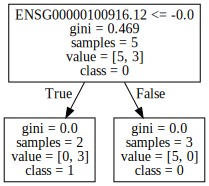

In [34]:
from sklearn import tree
from graphviz import Source
# randForest = RandomForestClassifier(n_estimators=10)
# randForest.fit(Xtrain, Ytrain)
# Extract a tree
estimator = randForest.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
Source(tree.export_graphviz(estimator, out_file=None, 
                feature_names = Xtrain.columns,
                class_names = Ytrain.index,
                rounded = True, proportion = False, 
                precision = 2, filled = True))

# Convert to png using system command (requires Graphviz)
# from subprocess import call
# call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
# from IPython.display import Image
# Image(filename = 'tree.png')
from IPython.display import SVG
graph = Source( tree.export_graphviz(estimator, out_file=None, feature_names=Xtrain.columns, class_names =['0','1']))
SVG(graph.pipe(format='svg'))

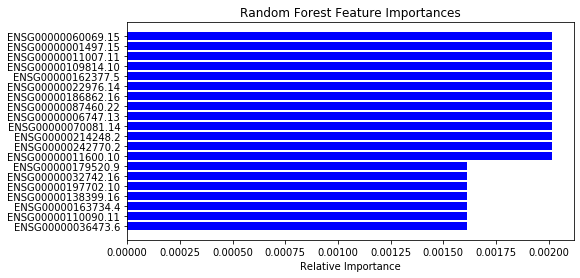

In [45]:
f_importance = randForest.feature_importances_
# top 20 features
# last 20 items in the array
sortedIdx = np.argsort(f_importance)[-20:]  

fig, ax = plt.subplots(figsize=(8,4))
plt.title('Random Forest Feature Importances')
ax.barh(range(len(sortedIdx)), f_importance[sortedIdx], color='b', align='center')
plt.yticks(range(len(sortedIdx)), [features[i] for i in sortedIdx])
plt.xlabel('Relative Importance')
plt.savefig('RandForImportance.png')
plt.show()
# Top20


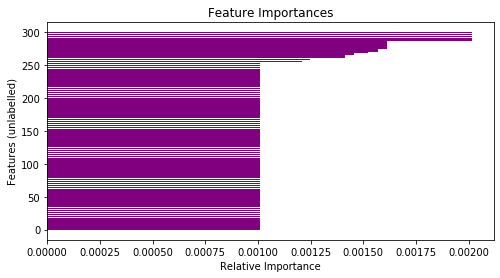

In [46]:
f_importance = randForest.feature_importances_
indices = np.argsort(f_importance)[-300:] 
fig, ax = plt.subplots(figsize=(8,4))
plt.title('Feature Importances')
ax.barh(range(len(indices)), f_importance[indices], color='purple', align='center')
plt.ylabel('Features (unlabelled)')
plt.xlabel('Relative Importance')
plt.savefig('AllFeatsImportance.png')
plt.show()

In [204]:
# import os
# from sklearn.tree import export_graphviz
# import six
# import pydot
# from sklearn import tree
# dotfile = six.StringIO()
# i_tree = 0
# for tree_in_forest in randForest.estimators_:
#     export_graphviz(tree_in_forest,out_file='tree.dot',
#     feature_names=Xtrain.columns,
#     filled=True,
#     rounded=True)
#     (graph,) = pydot.graph_from_dot_file('tree.dot')
#     name = 'tree' + str(i_tree)
#     graph.write_png(name+  '.png')
#     os.system('dot -Tpng tree.dot -o tree.png')
#     i_tree +=1

In [56]:
# Use the forest's predict method on the test data
# predictions = rf.predict(testFeatures)
# # Calculate the absolute errors
# errors = abs(predictions - testLabels)
# # Print out the mean absolute error (mae)
# print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

In [47]:
dfME = load_and_fillna("data/TCGA-MESO-GE.tsv")

In [48]:
principalCompMESO = pca_prep(df, 5)
print(principalCompMESO.nlargest(5, ['PC-1']))
print(principalCompMESO.nlargest(5, ['PC-2']))

                        PC-1      PC-2      PC-3      PC-4      PC-5
Ensembl_ID                                                          
ENSG00000168066.19  0.004068  0.000059  0.000057 -0.000053  0.000073
ENSG00000160199.13  0.004068  0.000058  0.000098  0.000045 -0.000042
ENSG00000182944.16  0.004068  0.000127  0.000119 -0.000025  0.000066
ENSG00000182149.19  0.004068  0.000134  0.000065 -0.000077  0.000067
ENSG00000182473.19  0.004068  0.000104  0.000064 -0.000064 -0.000056
                        PC-1      PC-2      PC-3      PC-4      PC-5
Ensembl_ID                                                          
ENSG00000066405.11  0.004049  0.001057 -0.029748  0.001480  0.002385
ENSG00000080618.12  0.004063  0.000973 -0.012377  0.002179  0.004934
ENSG00000096088.15  0.004063  0.000640 -0.010000  0.004199  0.014664
ENSG00000108576.8   0.004067  0.000604 -0.006543  0.000142 -0.000635
ENSG00000088926.12  0.004065  0.000593 -0.012000  0.002450  0.001999


In [49]:
principalCompMESO = principalCompMESO.T
principalCompMESO['Target'] = '2'
principalCompMESO.head()

Ensembl_ID,ENSG00000000003.13,ENSG00000000005.5,ENSG00000000419.11,ENSG00000000457.12,ENSG00000000460.15,ENSG00000000938.11,ENSG00000000971.14,ENSG00000001036.12,ENSG00000001084.9,ENSG00000001167.13,...,ENSGR0000276543.3,ENSGR0000277120.3,ENSGR0000280767.1,ENSGR0000281849.1,__no_feature,__ambiguous,__too_low_aQual,__not_aligned,__alignment_not_unique,Target
PC-1,-0.001676,-0.000028,-0.001675,-0.001388,-0.000673,-0.000604,-0.000775,-0.000912,-0.000299,-0.000365,...,0.004068,0.004068,0.004068,0.004068,0.004068,0.004068,0.004068,0.004068,0.004068,2
PC-2,-0.149663,-0.018969,-0.167814,-0.170663,-0.163008,-0.078096,-0.096229,-0.170478,-0.097126,-0.187566,...,0.000361,0.000361,0.000361,0.000361,0.000324,0.000310,0.000361,0.000361,0.000317,2
PC-3,0.083602,-0.074727,0.093861,-0.004919,0.239022,-0.296755,-0.115605,0.094663,0.200833,0.094013,...,0.000111,0.000111,0.000111,0.000111,0.000109,0.000115,0.000111,0.000111,0.000125,2
PC-4,0.009538,0.113392,-0.038760,0.226396,0.119218,-0.196225,0.008582,-0.212247,-0.017110,0.096652,...,-0.000083,-0.000083,-0.000083,-0.000083,0.000083,-0.000086,-0.000083,-0.000083,-0.000053,2
PC-5,0.037594,-0.147929,-0.034021,0.038909,-0.126614,-0.120663,-0.183663,-0.013717,-0.094490,-0.076802,...,-0.000011,-0.000011,-0.000011,-0.000011,-0.000042,-0.000009,-0.000011,-0.000011,-0.000017,2


In [50]:
canComp = pd.concat([principalCompLUAD,principalCompLUSC, principalCompMESO])

In [51]:
canComp.shape

(15, 60489)

In [52]:
feats = list(canComp.columns[:-1])
# labels Y
Y1 = canComp['Target']
X1 = canComp[feats]

In [53]:
Xtrain1, Xtest1, Ytrain1, Ytest1 = train_test_split(X1, Y1, test_size = 0.2, random_state = 42)

In [54]:
randFor1 = RandomForestClassifier(n_estimators=1000, random_state = 42)
# Train model
randFor1.fit(Xtrain1,Ytrain1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

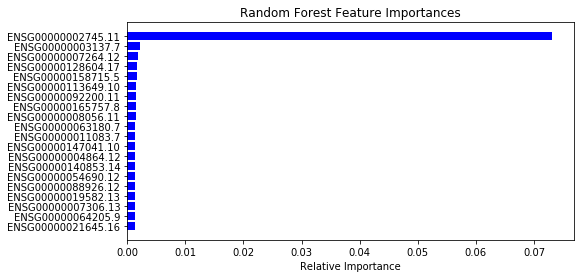

In [55]:
f_import = randFor1.feature_importances_
# top 20 features
# last 20 items in the array
sortedIdx1 = np.argsort(f_import)[-20:]  

fig, ax = plt.subplots(figsize=(8,4))
plt.title('Random Forest Feature Importances')
ax.barh(range(len(sortedIdx1)), f_import[sortedIdx1], color='b', align='center')
plt.yticks(range(len(sortedIdx1)), [feats[i] for i in sortedIdx1])
plt.xlabel('Relative Importance')
plt.savefig('RandForImport2.png')
plt.show()

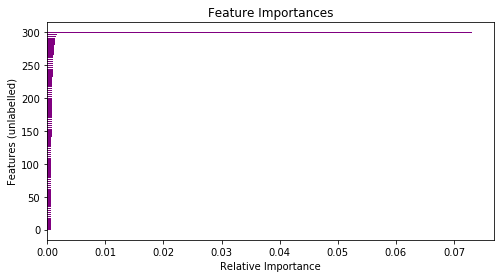

In [56]:
f_import = randFor1.feature_importances_
indices1 = np.argsort(f_import)[-300:] 
fig, ax = plt.subplots(figsize=(8,4))
plt.title('Feature Importances')
ax.barh(range(len(indices1)), f_import[indices1], color='purple', align='center')
plt.ylabel('Features (unlabelled)')
plt.xlabel('Relative Importance')
plt.savefig('AllFeatsImport2.png')
plt.show()